In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('train.csv',sep=';',decimal=',')
pd.set_option('display.max_row', 226)
pd.set_option('display.max_columns', 226)

## Etudes des valeurs manquantes 

In [81]:
df.shape

(2423, 246)

La DataFrame est composée de 2423 lignes et 246 colonnes.

In [82]:
missing = df.isna().sum()/df.shape[0]
valeurs_manquante = df.columns[(missing > 0.9)]
valeurs_manquante

Index(['Aménagements Validés', 'Cohérence projet de formation',
       'Moyenne générale au bac (N-1)',
       'Moyenne candidat en Sciences Economiques et Sociales Trimestre 1 Terminale',
       'Moyenne classe en Sciences Economiques et Sociales Trimestre 1 Terminale',
       'Moyenne candidat en Français Trimestre 1 Terminale',
       'Moyenne classe en Français Trimestre 1 Terminale',
       'Moyenne candidat en Enseignement moral et civique Trimestre 1 Terminale',
       'Moyenne classe en Enseignement moral et civique Trimestre 1 Terminale',
       'Moyenne candidat en Sciences physiques et chimiques en laboratoire Trimestre 1 Terminale',
       ...
       'Moyenne candidat en Chimie, biochimie, sciences du vivant Trimestre 3 Première',
       'Moyenne classe en Chimie, biochimie, sciences du vivant Trimestre 3 Première',
       'Moyenne candidat en Biotechnologies Trimestre 3 Première',
       'Moyenne classe en Biotechnologies Trimestre 3 Première',
       'Moyenne candidat en 

Il y a 161 colonnes contenant plus de 90% de valeurs manquantes

<AxesSubplot:>

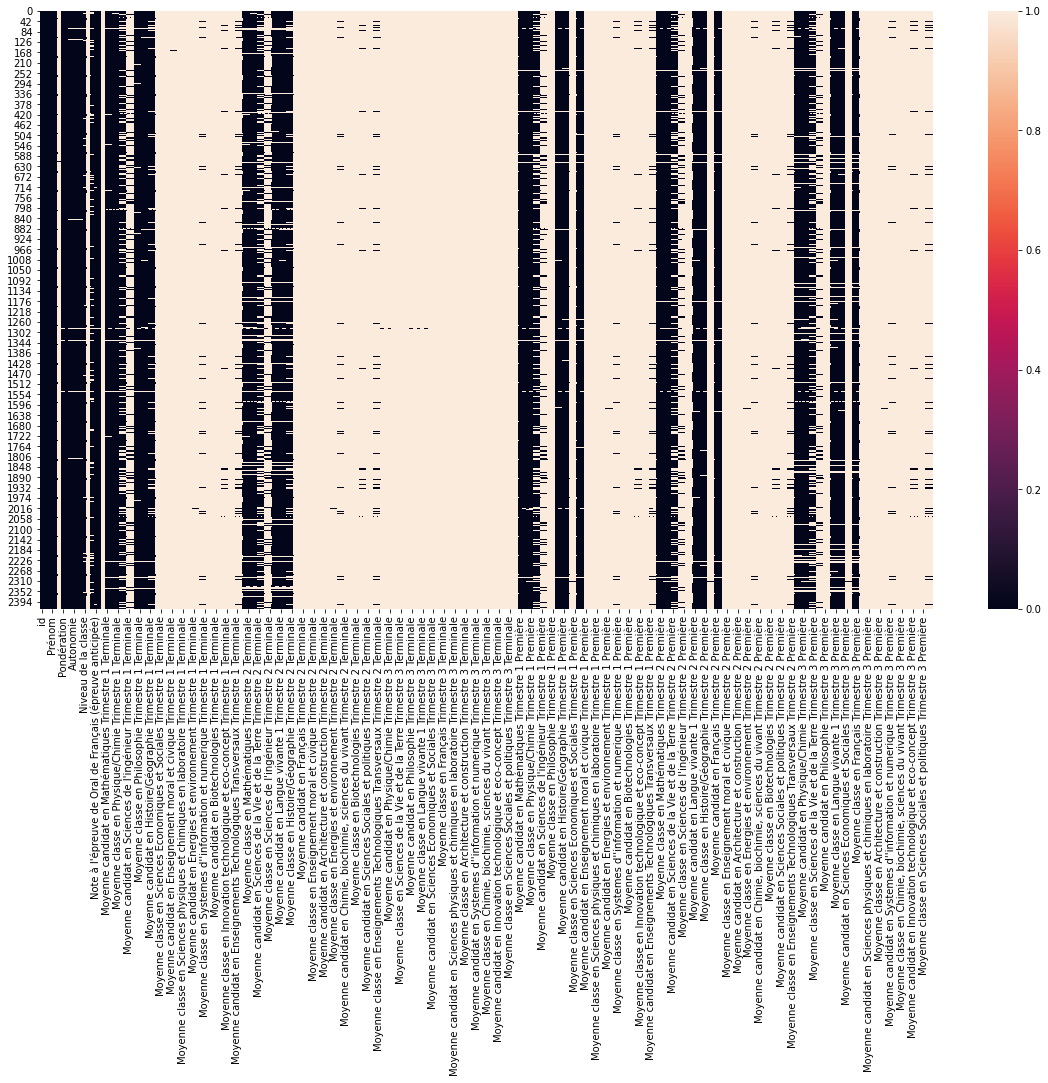

In [6]:
plt.figure(figsize=(20,11))
sns.heatmap(df.isna())

In [83]:
df = df.drop(valeurs_manquante, axis = 1)

Nous avons fait le choix de les supprimer totalement

## Encoder les variables catégorielles

Nous avons séparer le DataFrame en 3 pour faciliter notre encodage

In [84]:
debut = df.iloc[:, 0:6]
debut['Genre'] = debut['Genre'].replace(('H', 'F'),(0,1))

Ici, nous avons replacer les H(homme) et F(femme) par 0 et 1.

In [85]:
contexte = df.iloc[:, 6:13]
contexte = pd.get_dummies(contexte)

Ensuite, nous avons réalisé un get_dummies sur les varibles liés au contexte.

In [86]:
moyenne = df.iloc[:, 13:]
df = pd.concat([debut, contexte, moyenne], axis=1)

Nous avons ensuite assemblé les 3 DataFrames entre eux.

<AxesSubplot:>

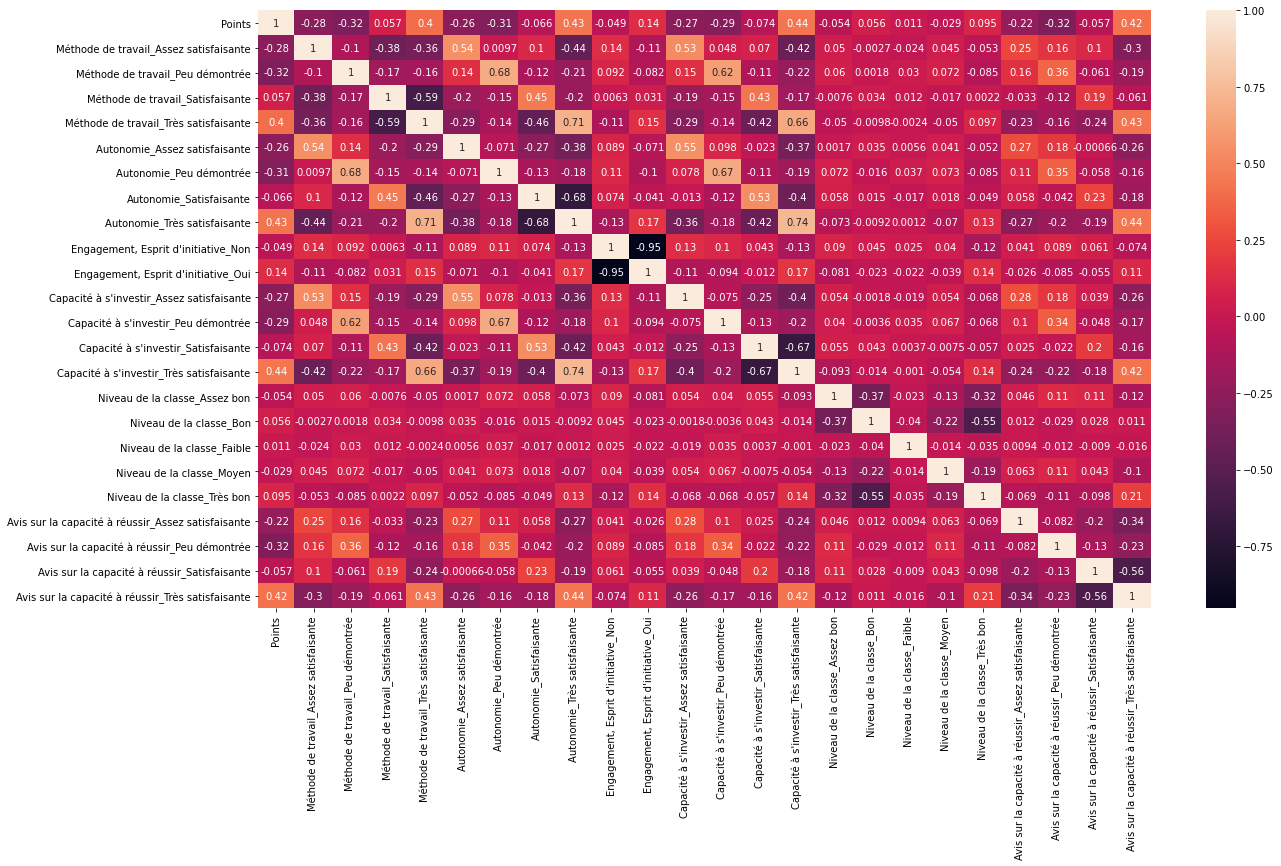

In [87]:
plt.figure(figsize = (20,11))
sns.heatmap((df.iloc[:, 6:30]).corr(),annot=True)

Nous avons fait le choix d'observer une heatmap sur les correlations entre les points obtenus par l'élève et les différents critères de son dossier. Nous pouvons observer que la variable Points est assez corrélé avec les critères "Méthode de travail très satisfaisante", "Autonomie très satisfaisante", "Capacité a s'investir très satisfaisante" et "Avis sur la capacité à s'investir très satisfaisante". Cela signifie que lorqu'un élève a obtenur la note "très satisfaisante" à un des critères cela aura un impact sur son nombre de points.

# Valeurs de SI et SVT

Nous nous sommes rendus compte que la colonne des moyennes des élèves en STI2D en Science de l'ingénieur contenait 80% de valeurs nulles. 
En effet, un élève en en STI2D étudie les sciences de l'ingénieur et non la SVT et inversement pour un élève en fillière Scientifique.

In [31]:
df['Moyenne candidat en SI ou SVT en Terminale Trimestre 1'] = np.NaN
df['Moyenne classe en SI ou SVT en Terminale Trimestre 1'] = np.NaN

df['Moyenne candidat en SI ou SVT en Terminale Trimestre 2'] = np.NaN
df['Moyenne classe en SI ou SVT en Terminale Trimestre 2'] = np.NaN

df['Moyenne candidat en SI ou SVT en Première Trimestre 1'] = np.NaN
df['Moyenne classe en SI ou SVT en Première Trimestre 1'] = np.NaN

df['Moyenne candidat en SI ou SVT en Première Trimestre 2'] = np.NaN
df['Moyenne classe en SI ou SVT en Première Trimestre 2'] = np.NaN

df['Moyenne candidat en SI ou SVT en Première Trimestre 3'] = np.NaN
df['Moyenne classe en SI ou SVT en Première Trimestre 3'] = np.NaN


df['Moyenne candidat en SI ou SVT en Terminale Trimestre 1'] = df['Moyenne candidat en SI ou SVT en Terminale Trimestre 1'].fillna(df[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Terminale", "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Terminale"]].max(1))
df['Moyenne candidat en SI ou SVT en Terminale Trimestre 2'] = df['Moyenne candidat en SI ou SVT en Terminale Trimestre 2'].fillna(df[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Terminale", "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Terminale"]].max(1))

df['Moyenne classe en SI ou SVT en Terminale Trimestre 1'] = df['Moyenne classe en SI ou SVT en Terminale Trimestre 1'].fillna(df[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Terminale", "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Terminale"]].max(1))
df['Moyenne classe en SI ou SVT en Terminale Trimestre 2'] = df['Moyenne classe en SI ou SVT en Terminale Trimestre 2'].fillna(df[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Terminale", "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Terminale"]].max(1))

df['Moyenne candidat en SI ou SVT en Première Trimestre 1'] = df['Moyenne candidat en SI ou SVT en Première Trimestre 1'].fillna(df[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Première", "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Première"]].max(1))
df['Moyenne candidat en SI ou SVT en Première Trimestre 2'] = df['Moyenne candidat en SI ou SVT en Première Trimestre 2'].fillna(df[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Première", "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Première"]].max(1))
df['Moyenne candidat en SI ou SVT en Première Trimestre 3'] = df['Moyenne candidat en SI ou SVT en Première Trimestre 3'].fillna(df[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Première", "Moyenne candidat en Sciences de l'ingénieur Trimestre 3 Première"]].max(1))

df['Moyenne classe en SI ou SVT en Première Trimestre 1'] = df['Moyenne classe en SI ou SVT en Première Trimestre 1'].fillna(df[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Première", "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Première"]].max(1))
df['Moyenne classe en SI ou SVT en Première Trimestre 2'] = df['Moyenne classe en SI ou SVT en Première Trimestre 2'].fillna(df[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Première", "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Première"]].max(1))
df['Moyenne classe en SI ou SVT en Première Trimestre 3'] = df['Moyenne classe en SI ou SVT en Première Trimestre 3'].fillna(df[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 3 Première", "Moyenne classe en Sciences de l'ingénieur Trimestre 3 Première"]].max(1))

Nous avons crée des nouvelles colonnes contenant pour les élèves leurs moyennes en SVT ou en SI. Nous avons remarqué que lorsqu'un élève posède une moyenne en SVT, il n'en possède pas en SI et inversement. Dans certains cas, nous avions 2 notes en SVT et en SI. Nous avons donc fait le choix de ne prendre uniquement la meilleur valeur entre les deux colonnes.

In [32]:
df = df.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Terminale", axis = 1)
df = df.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Terminale", axis = 1)

df = df.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Terminale", axis = 1)
df = df.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Terminale", axis = 1)

df = df.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Première", axis = 1)
df = df.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Première", axis = 1)

df = df.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Première", axis = 1)
df = df.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Première", axis = 1)

df = df.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Première", axis = 1)
df = df.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 3 Première", axis = 1)

df = df.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Terminale", axis = 1)
df = df.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Terminale", axis = 1)

df = df.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Terminale", axis = 1)
df = df.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Terminale", axis = 1)

df = df.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Première", axis = 1)
df = df.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Première", axis = 1)

df = df.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Première", axis = 1)
df = df.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Première", axis = 1)

df = df.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 3 Première", axis = 1)
df = df.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 3 Première", axis = 1)

Nous supprimons les colonnes de SVT et de SI.

In [33]:
df = df.fillna(df.mode().iloc[0])
df = df.drop(columns = 'Nom', axis = 1)
df = df.drop(columns = 'Prénom', axis = 1)
df = df.drop(columns = 'Genre', axis = 1)
df = df.drop(columns = "Bac", axis = 1)

a = pd.get_dummies(df.Pondération, prefix= 'Pondération')
df = pd.concat([a, df], axis = 1)

Toutes les valeurs manquantes dans les colonnes sont remplacés par la valeur la plus présente dans la colonne.
Nous avons supprimé 3 colonnes qui nous semble inutile.
La colonnes Pondération contient 4 valeurs différentes, nous avons fait le choix de réaliser un get_dummies sur cette colonne.

In [34]:
df = df.drop(columns = 'Pondération', axis = 1)

first_column = df.pop('id')
df.insert(0, 'id', first_column)

Nous supprimons par la suite la colonnes Pondération. La colonne 'id' est remise au début de la DataFrame pour plus de visibilité.

## Ajouts de colonnes

Nous ajoutons plusieurs colonnes à notre DataFrame. Selon les données que nous avons, le calcul de la moyenne sur les deux années ou encore l'évolution des notes en fonction des trimestres semble être utile. De nouvelles colonnes utile ont été ajoutés pour obtenir plus de données afin d'obtenir le meilleur modèle possible.

In [35]:
moyenne_terminale  = df.filter(regex='Moyenne candidat en').filter(regex = 'Terminale').mean(axis=1)
df['Moyenne en Terminale'] = moyenne_terminale

moyenne_terminale_trim1  = df.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 1 Terminale').mean(axis=1)
df['Moyenne en Terminale Trimèstre 1'] = moyenne_terminale_trim1

moyenne_terminale_trim2  = df.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 2 Terminale').mean(axis=1)
df['Moyenne en Terminale Trimèstre 2'] = moyenne_terminale_trim2

In [36]:
moyenne_premiere = df.filter(regex='Moyenne candidat en').filter(regex = 'Première').mean(axis=1)
df['Moyenne en Premiere'] = moyenne_premiere

moyenne_premiere_trim1 = df.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 1 Première').mean(axis=1)
df['Moyenne en Premiere Trimèstre 1'] = moyenne_premiere_trim1

moyenne_premiere_trim2 = df.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 2 Première').mean(axis=1)
df['Moyenne en Premiere Trimèstre 2'] = moyenne_premiere_trim2

moyenne_premiere_trim3 = df.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 3 Première').mean(axis=1)
df['Moyenne en Premiere Trimèstre 3'] = moyenne_premiere_trim3

In [37]:
moyenne_scientifique_terminale_maths = df.filter(regex='Moyenne candidat en').filter(regex='Mathématiques').filter(regex='Terminale').mean(axis=1)
df['Moyenne en Terminale en Maths'] = moyenne_scientifique_terminale_maths

moyenne_scientifique_terminale_phy = df.filter(regex='Moyenne candidat en').filter(regex='Physique/Chimie ').filter(regex='Terminale').mean(axis=1)
df['Moyenne en Terminale en Physique'] = moyenne_scientifique_terminale_phy

moyenne_scientifique_terminale_svt = df.filter(regex='Moyenne candidat en SI ou SVT').filter(regex='Terminale').mean(axis=1)
df['Moyenne en Terminale en SI ou SVT'] = moyenne_scientifique_terminale_svt


df['Moyenne Scientifique en Terminale'] = (moyenne_scientifique_terminale_maths + moyenne_scientifique_terminale_phy + moyenne_scientifique_terminale_svt)/3

moyenne_scientifique_premiere_maths = df.filter(regex='Moyenne candidat en').filter(regex='Mathématiques').filter(regex='Première').mean(axis=1)
df['Moyenne en Première en Maths'] = moyenne_scientifique_premiere_maths

moyenne_scientifique_premiere_phy = df.filter(regex='Moyenne candidat en').filter(regex='Physique/Chimie ').filter(regex='Première').mean(axis=1)
df['Moyenne en Première en Physique'] = moyenne_scientifique_premiere_phy

moyenne_scientifique_premiere_svt = df.filter(regex='Moyenne candidat en SI ou SVT').filter(regex='Première').mean(axis=1)
df['Moyenne en Première en SI ou SVT'] = moyenne_scientifique_premiere_svt


df['Moyenne Scientifique en Première'] = (moyenne_scientifique_premiere_maths + moyenne_scientifique_premiere_phy + moyenne_scientifique_premiere_svt)/3


In [38]:
new_columns = df.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / df.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns

new_columns2 = df.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /df.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns2

new_columns22 = df.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
df['Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns22

new_columns3 = df.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / df.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns3

new_columns4 = df.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns4

new_columns44 = df.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns44
           

new_columns7 = df.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / df.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne de la classe en Maths en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns7

new_columns8 = df.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /df.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns8

new_columns88 = df.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
df['Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns88

new_columns9 = df.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / df.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne de la classe en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns9

new_columns99 = df.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns99

new_columns999 = df.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns999
                 
    

new_columnssvt = df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne de la classe en SI en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt

new_columnssvt1 = df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt1

new_columnssvt2 = df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
df['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 2 et le Trimestre 3'] = new_columnssvt2

new_columnssvt3 = df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne de la classe en SI en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt3

new_columnssvt4 = df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt4

new_columnssvt5 = df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 2 et le Trimestre 3'] = new_columnssvt5

In [39]:
new_columns11 = df.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /df.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne du candidat en Français en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns11

new_columns12 = df.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
df['Evolution de la moyenne du candidat en Français en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns12


new_columns14 = df.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /df.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
df['Evolution de la moyenne de la classe en Français en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns14

new_columns15 = df.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / df.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
df['Evolution de la moyenne de la classe en Français en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns15               

In [40]:
new_columns16 = (df.filter(regex="Moyenne en Terminale en Maths").mean(axis=1) + df.filter(regex="Moyenne en Première en Maths").mean(axis=1))/2
df["Moyenne du candidat en Maths du candidat sur les deux années"] = new_columns16

new_columns17 = (df.filter(regex="Moyenne en Terminale en Physique").mean(axis=1) + df.filter(regex="Moyenne en Première en Physique").mean(axis=1))/2
df["Moyenne du candidat en Physique/Chimie du candidat sur les deux années"] = new_columns17

new_columns18 = (df.filter(regex="Moyenne en Première en SI ou SVT").mean(axis=1) + df.filter(regex="Moyenne en Terminale en SI ou SVT").mean(axis=1))/2
df["Moyenne du candidat en SI ou SVT du candidat sur les deux années"] = new_columns18

Dans la cellule suivante, des nouvelles colonnes sont ajoutés au DataFrame. Si l'évolution de la moyenne entre les différents trimestre et années et supérieur à 1, cela signifie que la moyenne de l'élève est en baisse, à l'inverse si cette évolution est inférieur à 1, alors cela signifie que l'élève a progressé et sa moyenne est en hausse.

In [41]:
new_columns_evolution_maths = (df.filter(regex="Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/3
maths = new_columns_evolution_maths > 1
df["Moyenne de l'évolution du candidat en Maths"] = np.where(maths, "Baisse", "Hausse")

new_columns_evolution_physiques = (df.filter(regex="Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/3
physiques = new_columns_evolution_physiques > 1
df["Moyenne de l'évolution du candidat en Physique/Chimie"] = np.where(physiques, "Baisse", "Hausse")

new_columns_evolution_svt_si = (df.filter(regex="Evolution de la moyenne du candidat en SI ou SVT en Terminale entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en SI ou SVT en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en SI ou SVT en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/3
svt = new_columns_evolution_svt_si > 1
df["Moyenne de l'évolution du candidat en SI ou SVT"] = np.where(svt, "Baisse", "Hausse")


new_columns_evolution_francais = (df.filter(regex="Evolution de la moyenne du candidat en Français en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + df.filter(regex="Evolution de la moyenne du candidat en Français en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/2
francais = new_columns_evolution_francais > 1
df["Moyenne de l'évolution du candidat en Francais"] = np.where(francais, "Baisse", "Hausse")


evolution_maths = pd.get_dummies(df["Moyenne de l'évolution du candidat en Maths"], prefix = "Moyenne de l'évolution du candidat en maths")
evolution_physiques = pd.get_dummies(df["Moyenne de l'évolution du candidat en Physique/Chimie"], prefix = "Moyenne de l'évolution du candidat en Physique/Chimie")
evolution_svt_si = pd.get_dummies(df["Moyenne de l'évolution du candidat en SI ou SVT"], prefix = "Moyenne de l'évolution du candidat en SI ou SVT")
evolution_francais = pd.get_dummies(df["Moyenne de l'évolution du candidat en Francais"], prefix = "Moyenne de l'évolution du candidat en Francais")

df = pd.concat([df, evolution_maths, evolution_physiques, evolution_svt_si, evolution_francais ], axis = 1)

df = df.drop(columns = "Moyenne de l'évolution du candidat en Maths", axis = 1)
df = df.drop(columns = "Moyenne de l'évolution du candidat en Physique/Chimie", axis = 1)
df = df.drop(columns = "Moyenne de l'évolution du candidat en SI ou SVT", axis = 1)
df = df.drop(columns = "Moyenne de l'évolution du candidat en Francais", axis = 1)

Nous réalisons un get_dummies sur ces nouvelles colonnes et les rajoutons à la DataFrame.

In [58]:
df

,id,Pondération_0.0,Pondération_0.5,Pondération_1.0,Pondération_1.5,Points,Méthode de travail_Assez satisfaisante,Méthode de travail_Peu démontrée,Méthode de travail_Satisfaisante,Méthode de travail_Très satisfaisante,Autonomie_Assez satisfaisante,Autonomie_Peu démontrée,Autonomie_Satisfaisante,Autonomie_Très satisfaisante,"Engagement, Esprit d'initiative_Non","Engagement, Esprit d'initiative_Oui",Capacité à s'investir_Assez satisfaisante,Capacité à s'investir_Peu démontrée,Capacité à s'investir_Satisfaisante,Capacité à s'investir_Très satisfaisante,Niveau de la classe_Assez bon,Niveau de la classe_Bon,Niveau de la classe_Faible,Niveau de la classe_Moyen,Niveau de la classe_Très bon,Avis sur la capacité à réussir_Assez satisfaisante,Avis sur la capacité à réussir_Peu démontrée,Avis sur la capacité à réussir_Satisfaisante,Avis sur la capacité à réussir_Très satisfaisante,Note à l'épreuve de Oral de Français (épreuve anticipée),Note à l'épreuve de Ecrit de Français (épreuve anticipée),Moyenne candidat en Mathématiques Trimestre 1 Terminale,Moyenne classe en Mathématiques Trimestre 1 Terminale,Moyenne candidat en Physique/Chimie Trimestre 1 Terminale,Moyenne classe en Physique/Chimie Trimestre 1 Terminale,Moyenne candidat en Philosophie Trimestre 1 Terminale,Moyenne classe en Philosophie Trimestre 1 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 1 Terminale,Moyenne classe en Langue vivante 1 Trimestre 1 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 1 Terminale,Moyenne classe en Histoire/Géographie Trimestre 1 Terminale,Moyenne candidat en Mathématiques Trimestre 2 Terminale,Moyenne classe en Mathématiques Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 2 Terminale,Moyenne classe en Physique/Chimie Trimestre 2 Terminale,Moyenne candidat en Philosophie Trimestre 2 Terminale,Moyenne classe en Philosophie Trimestre 2 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 2 Terminale,Moyenne classe en Langue vivante 1 Trimestre 2 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 2 Terminale,Moyenne classe en Histoire/Géographie Trimestre 2 Terminale,Moyenne candidat en Mathématiques Trimestre 1 Première,Moyenne classe en Mathématiques Trimestre 1 Première,Moyenne candidat en Physique/Chimie Trimestre 1 Première,Moyenne classe en Physique/Chimie Trimestre 1 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Première,Moyenne classe en Langue vivante 1 Trimestre 1 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Première,Moyenne classe en Histoire/Géographie Trimestre 1 Première,Moyenne candidat en Français Trimestre 1 Première,Moyenne classe en Français Trimestre 1 Première,Moyenne candidat en Mathématiques Trimestre 2 Première,Moyenne classe en Mathématiques Trimestre 2 Première,Moyenne candidat en Physique/Chimie Trimestre 2 Première,Moyenne classe en Physique/Chimie Trimestre 2 Première,Moyenne candidat en Langue vivante 1 Trimestre 2 Première,Moyenne classe en Langue vivante 1 Trimestre 2 Première,Moyenne candidat en Histoire/Géographie Trimestre 2 Première,Moyenne classe en Histoire/Géographie Trimestre 2 Première,Moyenne candidat en Français Trimestre 2 Première,Moyenne classe en Français Trimestre 2 Première,Moyenne candidat en Mathématiques Trimestre 3 Première,Moyenne classe en Mathématiques Trimestre 3 Première,Moyenne candidat en Physique/Chimie Trimestre 3 Première,Moyenne classe en Physique/Chimie Trimestre 3 Première,Moyenne candidat en Langue vivante 1 Trimestre 3 Première,Moyenne classe en Langue vivante 1 Trimestre 3 Première,Moyenne candidat en Histoire/Géographie Trimestre 3 Première,Moyenne classe en Histoire/Géographie Trimestre 3 Première,Moyenne candidat en Français Trimestre 3 Première,Moyenne classe en Français Trimestre 3 Première,Moyenne candidat en SI ou SVT en Terminale Trimestre 1,Moyenne classe en SI ou SVT en Terminale Trimestre 1,Moyenne candidat en SI ou SVT en Terminale Trimestre 2,Moyenne classe en SI ou SVT en Terminale Trimes

<AxesSubplot:>

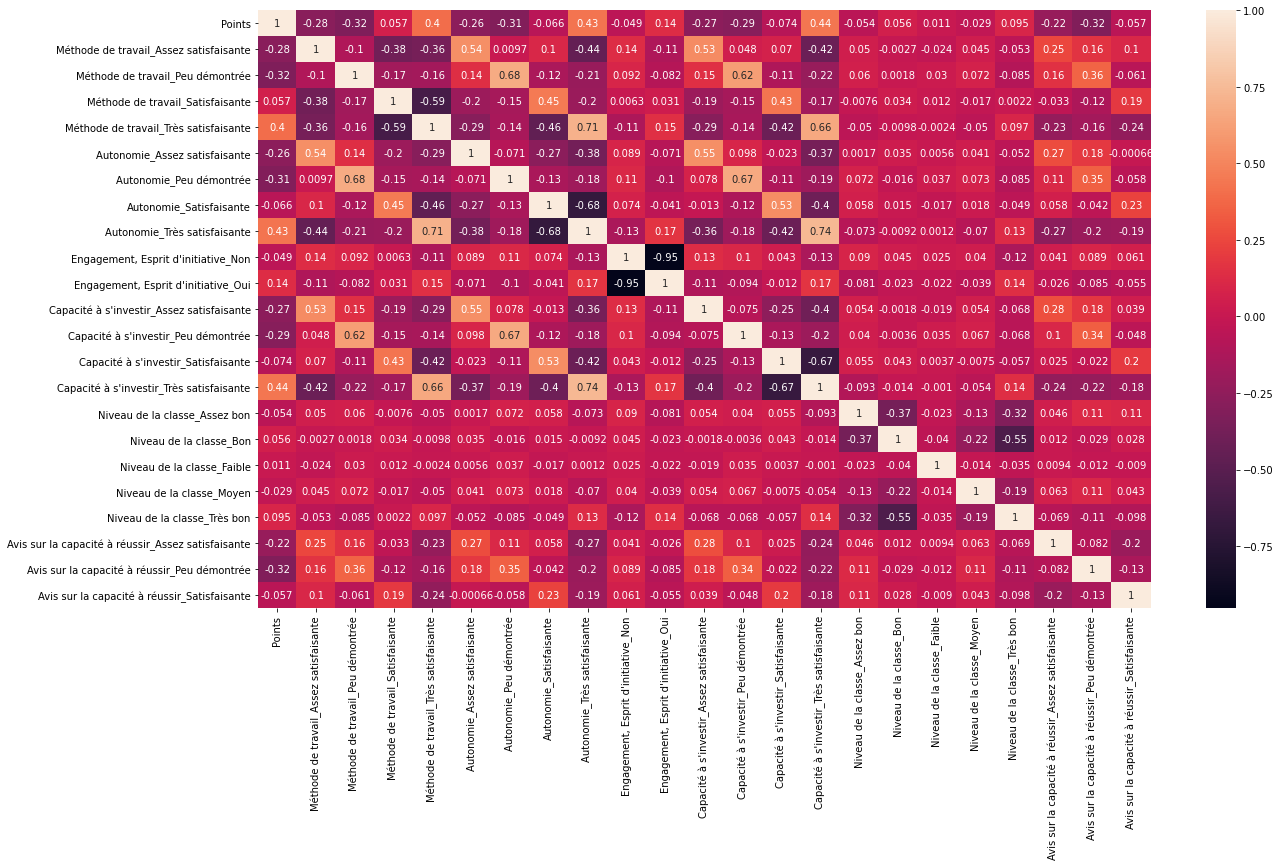

In [66]:
plt.figure(figsize = (20,11))
sns.heatmap((df.iloc[:, 5:28]).corr(),annot=True)

In [22]:
df = df.reindex(sorted(df.columns), axis = 1)

Nous nous sommes rendu compte que XGBoost exige que les colonnes des DataFrames d'entraînement et de test soient placées au même endroit. C'est pourquoi il est préférable de trier par ordre alphabétique les colonnes en fonction de la première lettre de leurs noms.


In [202]:
df

,Autonomie_Assez satisfaisante,Autonomie_Peu démontrée,Autonomie_Satisfaisante,Autonomie_Très satisfaisante,Avis sur la capacité à réussir_Assez satisfaisante,Avis sur la capacité à réussir_Peu démontrée,Avis sur la capacité à réussir_Satisfaisante,Avis sur la capacité à réussir_Très satisfaisante,Capacité à s'investir_Assez satisfaisante,Capacité à s'investir_Peu démontrée,Capacité à s'investir_Satisfaisante,Capacité à s'investir_Très satisfaisante,Evolution de la moyenne de la classe en Français en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Français en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en Maths en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en SI en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en SI en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en SI en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Français en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Français en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2,Moyenne Scientifique en Première,Moyenne Scientifique en Terminale,Moyenne candidat en Français Trimestre 1 Première,Moyenne candidat en Français Trimestre 2 Première,Moyenne candidat en Français Trimestre 3 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 2 Première,Moyenne candidat en Histoire/Géographie Trimestre 2 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 3 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 2 Première,Moyenne candidat en Langue vivante 1 Trimestre 2 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 3 Première,Moyenne candidat en Mathématiques Trimestre 1 Première,Moyenne candidat en Mathématiques Trimestre 1 Terminale,Moyenne candidat en Mathématiques Trimestre 2 Première,Moyenne candidat en Mathématiques Trimestre 2 Terminale,Moyenne candidat en Mathématiques Trimestre 3 Première,Moyenne candidat en Philosophie Trimestre 1 Terminale,Moyenne candidat en Philosophie Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 1 Première,Moyenne candidat en Physique/Chimie Trimestre 1 Terminale,Moyenne candidat en Physique/Chimie Trimestre 2 Première,Moyenne candidat en Physique/Chimie Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 3 Première,Moyenne candidat en SI ou SVT en Première Trimestre 1,Moyenne candidat en SI ou SVT en Première Trimestre 2,Moyenne candidat en SI ou SVT en Première Trime

# Création du modèle

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

On associe a Y la colonnes que l'on souhaite prédire et a X la DataFrame sans la colonne à prédire.

In [31]:
X = df.drop(columns = 'Points', axis = 1)
y = df['Points']

In [32]:
X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
def rmse(model, X_train, y_train):
    y_pred = model.predict(X_test)
    
    rss=((y_test-y_pred)**2).sum()
    mse=np.mean((y_test-y_pred)**2)
    return np.sqrt(np.mean((y_test-y_pred)**2))

Nous avons crée une fonction permettant de calculer la RMSE et de notre modèle

Nous sommes en présence d'un problème de régression. C'est pourquoi nous avons choisis de créer un modèle uniquement avec des modèles de régression.

# LASSO

In [40]:
model = linear_model.Lasso()
model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de y_pred :", y_pred.mean())

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies.mean())

accuracies1 = cross_val_score(estimator = model, X = X_test, y = y_test,  scoring = rmse)
print('RMSE Test =', accuracies1.mean())

score : 0.6603787844873161
Valeur moyenne de y_pred : 96.5841544293861
RMSE Train = 12.903571779966015
RMSE Test = 12.63155264931035


Les résultats obtenus pour Lasso ne sont pas très bons. Nous laissons de côté ce modèle pour le moment.

# ElasticNET

In [43]:
model = linear_model.ElasticNet()
model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de y_pred :", y_pred.mean())

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies.mean())

accuracies1 = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = rmse)
print('RMSE Test =', accuracies1.mean())

score : 0.6691406361832164
Valeur moyenne de y_pred : 96.55060765617377
RMSE Train = 12.72714882518748
RMSE Test = 12.283718486423648


Les résultats obtenus pour ElasticNet ne sont pas très bons. Nous laissons de côté ce modèle pour le moment.

# CATBOOST

In [44]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier, CatBoost

In [110]:
model = CatBoostRegressor(iterations=2000, depth=6, learning_rate=0.01, loss_function='MAE',eval_metric='MAE',od_type="Iter",od_wait=27)
model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)

0:	learn: 14.6239051	total: 15ms	remaining: 30s
1:	learn: 14.5076239	total: 25.1ms	remaining: 25.1s
2:	learn: 14.4018446	total: 36ms	remaining: 24s
3:	learn: 14.2991682	total: 47.5ms	remaining: 23.7s
4:	learn: 14.2009385	total: 58ms	remaining: 23.2s
5:	learn: 14.0944811	total: 69.5ms	remaining: 23.1s
6:	learn: 13.9885632	total: 80.3ms	remaining: 22.9s
7:	learn: 13.8880662	total: 91.6ms	remaining: 22.8s
8:	learn: 13.7785827	total: 108ms	remaining: 23.8s
9:	learn: 13.6760083	total: 117ms	remaining: 23.3s
10:	learn: 13.5590081	total: 128ms	remaining: 23.1s
11:	learn: 13.4615488	total: 138ms	remaining: 22.9s
12:	learn: 13.3661099	total: 146ms	remaining: 22.3s
13:	learn: 13.2698033	total: 153ms	remaining: 21.7s
14:	learn: 13.1711722	total: 160ms	remaining: 21.2s
15:	learn: 13.0606419	total: 167ms	remaining: 20.7s
16:	learn: 12.9694782	total: 174ms	remaining: 20.3s
17:	learn: 12.8752670	total: 180ms	remaining: 19.9s
18:	learn: 12.7868354	total: 186ms	remaining: 19.4s
19:	learn: 12.6951629	to

164:	learn: 6.3903831	total: 1.45s	remaining: 16.1s
165:	learn: 6.3701523	total: 1.46s	remaining: 16.1s
166:	learn: 6.3537635	total: 1.47s	remaining: 16.1s
167:	learn: 6.3388324	total: 1.48s	remaining: 16.1s
168:	learn: 6.3207865	total: 1.49s	remaining: 16.1s
169:	learn: 6.3049769	total: 1.49s	remaining: 16.1s
170:	learn: 6.2882874	total: 1.5s	remaining: 16.1s
171:	learn: 6.2702228	total: 1.51s	remaining: 16s
172:	learn: 6.2530650	total: 1.52s	remaining: 16s
173:	learn: 6.2373908	total: 1.52s	remaining: 16s
174:	learn: 6.2182528	total: 1.53s	remaining: 15.9s
175:	learn: 6.2034254	total: 1.54s	remaining: 15.9s
176:	learn: 6.1872769	total: 1.54s	remaining: 15.9s
177:	learn: 6.1704902	total: 1.55s	remaining: 15.9s
178:	learn: 6.1556217	total: 1.56s	remaining: 15.8s
179:	learn: 6.1407661	total: 1.56s	remaining: 15.8s
180:	learn: 6.1247538	total: 1.57s	remaining: 15.8s
181:	learn: 6.1091094	total: 1.58s	remaining: 15.7s
182:	learn: 6.0926198	total: 1.58s	remaining: 15.7s
183:	learn: 6.07803

349:	learn: 4.7351870	total: 2.86s	remaining: 13.5s
350:	learn: 4.7312976	total: 2.87s	remaining: 13.5s
351:	learn: 4.7262258	total: 2.88s	remaining: 13.5s
352:	learn: 4.7225357	total: 2.89s	remaining: 13.5s
353:	learn: 4.7186980	total: 2.9s	remaining: 13.5s
354:	learn: 4.7142054	total: 2.9s	remaining: 13.4s
355:	learn: 4.7103309	total: 2.91s	remaining: 13.4s
356:	learn: 4.7067030	total: 2.92s	remaining: 13.4s
357:	learn: 4.7023756	total: 2.92s	remaining: 13.4s
358:	learn: 4.6987113	total: 2.93s	remaining: 13.4s
359:	learn: 4.6943888	total: 2.94s	remaining: 13.4s
360:	learn: 4.6909355	total: 2.94s	remaining: 13.4s
361:	learn: 4.6874482	total: 2.95s	remaining: 13.3s
362:	learn: 4.6825055	total: 2.96s	remaining: 13.3s
363:	learn: 4.6797771	total: 2.96s	remaining: 13.3s
364:	learn: 4.6757618	total: 2.97s	remaining: 13.3s
365:	learn: 4.6721855	total: 2.97s	remaining: 13.3s
366:	learn: 4.6681364	total: 2.98s	remaining: 13.3s
367:	learn: 4.6636973	total: 2.99s	remaining: 13.3s
368:	learn: 4.

518:	learn: 4.2064186	total: 4.25s	remaining: 12.1s
519:	learn: 4.2039956	total: 4.27s	remaining: 12.1s
520:	learn: 4.2012577	total: 4.28s	remaining: 12.1s
521:	learn: 4.1994996	total: 4.29s	remaining: 12.2s
522:	learn: 4.1980790	total: 4.3s	remaining: 12.2s
523:	learn: 4.1953099	total: 4.32s	remaining: 12.2s
524:	learn: 4.1927970	total: 4.33s	remaining: 12.2s
525:	learn: 4.1911776	total: 4.34s	remaining: 12.2s
526:	learn: 4.1892207	total: 4.36s	remaining: 12.2s
527:	learn: 4.1873418	total: 4.37s	remaining: 12.2s
528:	learn: 4.1709169	total: 4.38s	remaining: 12.2s
529:	learn: 4.1682783	total: 4.39s	remaining: 12.2s
530:	learn: 4.1661431	total: 4.4s	remaining: 12.2s
531:	learn: 4.1644572	total: 4.41s	remaining: 12.2s
532:	learn: 4.1614377	total: 4.42s	remaining: 12.2s
533:	learn: 4.1601535	total: 4.43s	remaining: 12.2s
534:	learn: 4.1583085	total: 4.45s	remaining: 12.2s
535:	learn: 4.1557009	total: 4.46s	remaining: 12.2s
536:	learn: 4.1538914	total: 4.47s	remaining: 12.2s
537:	learn: 4.

688:	learn: 3.8471883	total: 6.27s	remaining: 11.9s
689:	learn: 3.8459022	total: 6.29s	remaining: 11.9s
690:	learn: 3.8442548	total: 6.3s	remaining: 11.9s
691:	learn: 3.8416827	total: 6.31s	remaining: 11.9s
692:	learn: 3.8401163	total: 6.32s	remaining: 11.9s
693:	learn: 3.8383512	total: 6.33s	remaining: 11.9s
694:	learn: 3.8358976	total: 6.35s	remaining: 11.9s
695:	learn: 3.8346530	total: 6.36s	remaining: 11.9s
696:	learn: 3.8327519	total: 6.37s	remaining: 11.9s
697:	learn: 3.8315380	total: 6.38s	remaining: 11.9s
698:	learn: 3.8301616	total: 6.39s	remaining: 11.9s
699:	learn: 3.8283503	total: 6.4s	remaining: 11.9s
700:	learn: 3.8268464	total: 6.41s	remaining: 11.9s
701:	learn: 3.8252661	total: 6.42s	remaining: 11.9s
702:	learn: 3.8242299	total: 6.43s	remaining: 11.9s
703:	learn: 3.8223582	total: 6.45s	remaining: 11.9s
704:	learn: 3.8201987	total: 6.46s	remaining: 11.9s
705:	learn: 3.8187485	total: 6.47s	remaining: 11.9s
706:	learn: 3.8169986	total: 6.48s	remaining: 11.9s
707:	learn: 3.

855:	learn: 3.5049334	total: 8.1s	remaining: 10.8s
856:	learn: 3.4974928	total: 8.12s	remaining: 10.8s
857:	learn: 3.4960464	total: 8.13s	remaining: 10.8s
858:	learn: 3.4950522	total: 8.15s	remaining: 10.8s
859:	learn: 3.4938671	total: 8.16s	remaining: 10.8s
860:	learn: 3.4930469	total: 8.17s	remaining: 10.8s
861:	learn: 3.4915557	total: 8.19s	remaining: 10.8s
862:	learn: 3.4906577	total: 8.2s	remaining: 10.8s
863:	learn: 3.4893842	total: 8.21s	remaining: 10.8s
864:	learn: 3.4879788	total: 8.22s	remaining: 10.8s
865:	learn: 3.4871842	total: 8.23s	remaining: 10.8s
866:	learn: 3.4854624	total: 8.25s	remaining: 10.8s
867:	learn: 3.4828817	total: 8.26s	remaining: 10.8s
868:	learn: 3.4815194	total: 8.27s	remaining: 10.8s
869:	learn: 3.4798430	total: 8.28s	remaining: 10.8s
870:	learn: 3.4782966	total: 8.29s	remaining: 10.7s
871:	learn: 3.4709099	total: 8.29s	remaining: 10.7s
872:	learn: 3.4696103	total: 8.3s	remaining: 10.7s
873:	learn: 3.4685467	total: 8.31s	remaining: 10.7s
874:	learn: 3.4

1029:	learn: 2.8817429	total: 9.94s	remaining: 9.36s
1030:	learn: 2.8731524	total: 9.95s	remaining: 9.35s
1031:	learn: 2.8721939	total: 9.96s	remaining: 9.34s
1032:	learn: 2.8707542	total: 9.97s	remaining: 9.33s
1033:	learn: 2.8695640	total: 9.98s	remaining: 9.32s
1034:	learn: 2.8684165	total: 10s	remaining: 9.35s
1035:	learn: 2.8673569	total: 10s	remaining: 9.35s
1036:	learn: 2.8666106	total: 10.1s	remaining: 9.34s
1037:	learn: 2.8657174	total: 10.1s	remaining: 9.33s
1038:	learn: 2.8582176	total: 10.1s	remaining: 9.32s
1039:	learn: 2.8496608	total: 10.1s	remaining: 9.32s
1040:	learn: 2.8483437	total: 10.1s	remaining: 9.31s
1041:	learn: 2.8400659	total: 10.1s	remaining: 9.3s
1042:	learn: 2.8393506	total: 10.1s	remaining: 9.29s
1043:	learn: 2.8380605	total: 10.1s	remaining: 9.28s
1044:	learn: 2.8365853	total: 10.1s	remaining: 9.27s
1045:	learn: 2.8279175	total: 10.2s	remaining: 9.26s
1046:	learn: 2.8192691	total: 10.2s	remaining: 9.25s
1047:	learn: 2.8180564	total: 10.2s	remaining: 9.25

1196:	learn: 2.4630995	total: 12s	remaining: 8.05s
1197:	learn: 2.4621861	total: 12s	remaining: 8.05s
1198:	learn: 2.4614707	total: 12s	remaining: 8.04s
1199:	learn: 2.4572947	total: 12s	remaining: 8.03s
1200:	learn: 2.4516260	total: 12.1s	remaining: 8.02s
1201:	learn: 2.4455317	total: 12.1s	remaining: 8.01s
1202:	learn: 2.4397558	total: 12.1s	remaining: 8s
1203:	learn: 2.4387242	total: 12.1s	remaining: 7.99s
1204:	learn: 2.4380668	total: 12.1s	remaining: 7.97s
1205:	learn: 2.4324865	total: 12.1s	remaining: 7.96s
1206:	learn: 2.4309430	total: 12.1s	remaining: 7.95s
1207:	learn: 2.4245384	total: 12.1s	remaining: 7.94s
1208:	learn: 2.4233587	total: 12.1s	remaining: 7.93s
1209:	learn: 2.4222779	total: 12.1s	remaining: 7.92s
1210:	learn: 2.4214171	total: 12.1s	remaining: 7.91s
1211:	learn: 2.4206693	total: 12.2s	remaining: 7.9s
1212:	learn: 2.4150228	total: 12.2s	remaining: 7.89s
1213:	learn: 2.4142029	total: 12.2s	remaining: 7.88s
1214:	learn: 2.4128645	total: 12.2s	remaining: 7.87s
1215:

1364:	learn: 2.0991684	total: 13.6s	remaining: 6.33s
1365:	learn: 2.0985409	total: 13.6s	remaining: 6.32s
1366:	learn: 2.0956513	total: 13.6s	remaining: 6.31s
1367:	learn: 2.0923233	total: 13.6s	remaining: 6.3s
1368:	learn: 2.0918154	total: 13.7s	remaining: 6.29s
1369:	learn: 2.0905885	total: 13.7s	remaining: 6.29s
1370:	learn: 2.0874930	total: 13.7s	remaining: 6.28s
1371:	learn: 2.0870349	total: 13.7s	remaining: 6.27s
1372:	learn: 2.0838134	total: 13.7s	remaining: 6.26s
1373:	learn: 2.0831711	total: 13.7s	remaining: 6.26s
1374:	learn: 2.0796375	total: 13.8s	remaining: 6.25s
1375:	learn: 2.0759958	total: 13.8s	remaining: 6.24s
1376:	learn: 2.0748167	total: 13.8s	remaining: 6.23s
1377:	learn: 2.0738192	total: 13.8s	remaining: 6.22s
1378:	learn: 2.0730536	total: 13.8s	remaining: 6.22s
1379:	learn: 2.0723845	total: 13.8s	remaining: 6.21s
1380:	learn: 2.0693568	total: 13.8s	remaining: 6.2s
1381:	learn: 2.0685902	total: 13.8s	remaining: 6.19s
1382:	learn: 2.0679662	total: 13.9s	remaining: 6

1527:	learn: 1.8861895	total: 15s	remaining: 4.64s
1528:	learn: 1.8858751	total: 15s	remaining: 4.63s
1529:	learn: 1.8849730	total: 15s	remaining: 4.62s
1530:	learn: 1.8824960	total: 15s	remaining: 4.61s
1531:	learn: 1.8799820	total: 15.1s	remaining: 4.6s
1532:	learn: 1.8776384	total: 15.1s	remaining: 4.59s
1533:	learn: 1.8759147	total: 15.1s	remaining: 4.58s
1534:	learn: 1.8732213	total: 15.1s	remaining: 4.57s
1535:	learn: 1.8709068	total: 15.1s	remaining: 4.55s
1536:	learn: 1.8704775	total: 15.1s	remaining: 4.54s
1537:	learn: 1.8699894	total: 15.1s	remaining: 4.53s
1538:	learn: 1.8691574	total: 15.1s	remaining: 4.52s
1539:	learn: 1.8686071	total: 15.1s	remaining: 4.51s
1540:	learn: 1.8664545	total: 15.1s	remaining: 4.5s
1541:	learn: 1.8661571	total: 15.1s	remaining: 4.49s
1542:	learn: 1.8653423	total: 15.1s	remaining: 4.48s
1543:	learn: 1.8647899	total: 15.1s	remaining: 4.47s
1544:	learn: 1.8642702	total: 15.1s	remaining: 4.46s
1545:	learn: 1.8639363	total: 15.2s	remaining: 4.45s
154

1683:	learn: 1.7310612	total: 16.2s	remaining: 3.04s
1684:	learn: 1.7307754	total: 16.2s	remaining: 3.03s
1685:	learn: 1.7291939	total: 16.2s	remaining: 3.02s
1686:	learn: 1.7289180	total: 16.3s	remaining: 3.02s
1687:	learn: 1.7276553	total: 16.3s	remaining: 3.01s
1688:	learn: 1.7273345	total: 16.3s	remaining: 3s
1689:	learn: 1.7258276	total: 16.3s	remaining: 2.99s
1690:	learn: 1.7245404	total: 16.3s	remaining: 2.98s
1691:	learn: 1.7242716	total: 16.3s	remaining: 2.97s
1692:	learn: 1.7231114	total: 16.3s	remaining: 2.96s
1693:	learn: 1.7222864	total: 16.3s	remaining: 2.95s
1694:	learn: 1.7202299	total: 16.3s	remaining: 2.94s
1695:	learn: 1.7197165	total: 16.3s	remaining: 2.93s
1696:	learn: 1.7191579	total: 16.4s	remaining: 2.92s
1697:	learn: 1.7178276	total: 16.4s	remaining: 2.91s
1698:	learn: 1.7173347	total: 16.4s	remaining: 2.9s
1699:	learn: 1.7170634	total: 16.4s	remaining: 2.89s
1700:	learn: 1.7166255	total: 16.4s	remaining: 2.88s
1701:	learn: 1.7161617	total: 16.4s	remaining: 2.8

1843:	learn: 1.6157355	total: 17.6s	remaining: 1.49s
1844:	learn: 1.6150343	total: 17.6s	remaining: 1.48s
1845:	learn: 1.6139656	total: 17.6s	remaining: 1.47s
1846:	learn: 1.6133643	total: 17.6s	remaining: 1.46s
1847:	learn: 1.6129278	total: 17.7s	remaining: 1.45s
1848:	learn: 1.6125471	total: 17.7s	remaining: 1.44s
1849:	learn: 1.6119269	total: 17.7s	remaining: 1.43s
1850:	learn: 1.6112378	total: 17.7s	remaining: 1.42s
1851:	learn: 1.6107039	total: 17.7s	remaining: 1.41s
1852:	learn: 1.6096205	total: 17.7s	remaining: 1.4s
1853:	learn: 1.6087418	total: 17.7s	remaining: 1.39s
1854:	learn: 1.6078264	total: 17.7s	remaining: 1.38s
1855:	learn: 1.6072904	total: 17.7s	remaining: 1.38s
1856:	learn: 1.6067962	total: 17.7s	remaining: 1.36s
1857:	learn: 1.6054823	total: 17.7s	remaining: 1.36s
1858:	learn: 1.6043783	total: 17.8s	remaining: 1.35s
1859:	learn: 1.6032978	total: 17.8s	remaining: 1.34s
1860:	learn: 1.6024349	total: 17.8s	remaining: 1.33s
1861:	learn: 1.6021340	total: 17.8s	remaining: 

In [99]:
print("Valeur moyenne de y_pred :", y_pred.mean())
print('RMSE Train =', accuracies.mean())
print('RMSE Test =', accuracies1.mean())

Valeur moyenne de y_pred : 95.98788436189965
RMSE Train = 5.588759338994322
RMSE Test = 4.7604344161079934


# ADABOOST

In [48]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de y_pred :", y_pred.mean())

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies.mean())

accuracies = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = rmse)
print('RMSE Test =', accuracies.mean())

score : 0.865138148897127
Valeur moyenne de y_pred : 93.301432914697
RMSE Train = 8.088218959311686
RMSE Test = 5.615331475023878


Les valeurs de RMSE d'AdaBoost ne sont pas mauvaises. Nous avons donc utilisé RandomizedSearchCV pour trouver de bon paramètres a lui associer.

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'random_state': np.arange(1,1000),
 'n_estimators': np.arange(50, 100),
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'random_stat...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 96

In [53]:
pre_gs_inst.fit(X_train, y_train)

print(pre_gs_inst.best_params_)
print(pre_gs_inst.best_score_)

{'random_state': 666, 'n_estimators': 72, 'loss': 'square', 'learning_rate': 0.3}
0.8612104024651647


In [55]:
model = AdaBoostRegressor(random_state= 666, n_estimators= 72, loss= 'square', learning_rate= 0.3)
model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de y_pred :", y_pred.mean())

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies.mean())

accuracies = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = rmse)
print('RMSE Test =', accuracies.mean())

score : 0.8490356148278426
Valeur moyenne de y_pred : 94.79659186337705
RMSE Train = 8.107581074677212
RMSE Test = 5.756697225856522


Malgré les nouveaux paramètres nous obtenons un RMSE supérieur a celui du modèle de départ

# RANDOMFOREST

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de y_pred :", y_pred.mean())

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, scoring = rmse)
print('RMSE Train =', accuracies.mean())

accuracies = cross_val_score(estimator = model, X = X_test, y = y_test, cv = 10, scoring = rmse)
print('RMSE Test =', accuracies.mean())

score : 0.7200068363343669
Valeur moyenne de y_pred : 96.14879490629131
RMSE Train = 11.64308860119134
RMSE Test = 10.890096995683495


Les résultats obtenus pour le RandomForestRegressor ne sont pas très bons. Nous laissons de côté ce modèle pour le moment.

# GBM

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
model = GradientBoostingRegressor(criterion='friedman_mse', init=None,
 learning_rate=0.1, max_depth=3,
 max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=400, presort='auto', random_state=None,
 subsample=1.0, verbose=0, warm_start=False)

model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de y_pred :", y_pred.mean())

accuracies1 = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies1.mean())

accuracies2 = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = rmse)
print('RMSE Test =', accuracies2.mean())

/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "


score : 0.9603202233605606
Valeur moyenne de y_pred : 95.98313692391018


/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.2

RMSE Train = 4.727869359488411


/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/benjaminnahum/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:304: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.2

RMSE Test = 2.810266711691193


In [62]:
print("Valeur moyenne de y_pred :", y_pred.mean())
print('RMSE Train =', accuracies1.mean())
print('RMSE Test =', accuracies2.mean())
print('Score =',model.score(X_test, y_test) )

Valeur moyenne de y_pred : 95.97211985403447
RMSE Train = 4.751175926057131
RMSE Test = 2.7778992281039003
Score = 0.9595339620244746


Le GradientBoostingRegressor semble donner de bons résultats en RMSE. Nous avons afficher par la suite les colonnes ayant le plus d'importances sur le modèle.

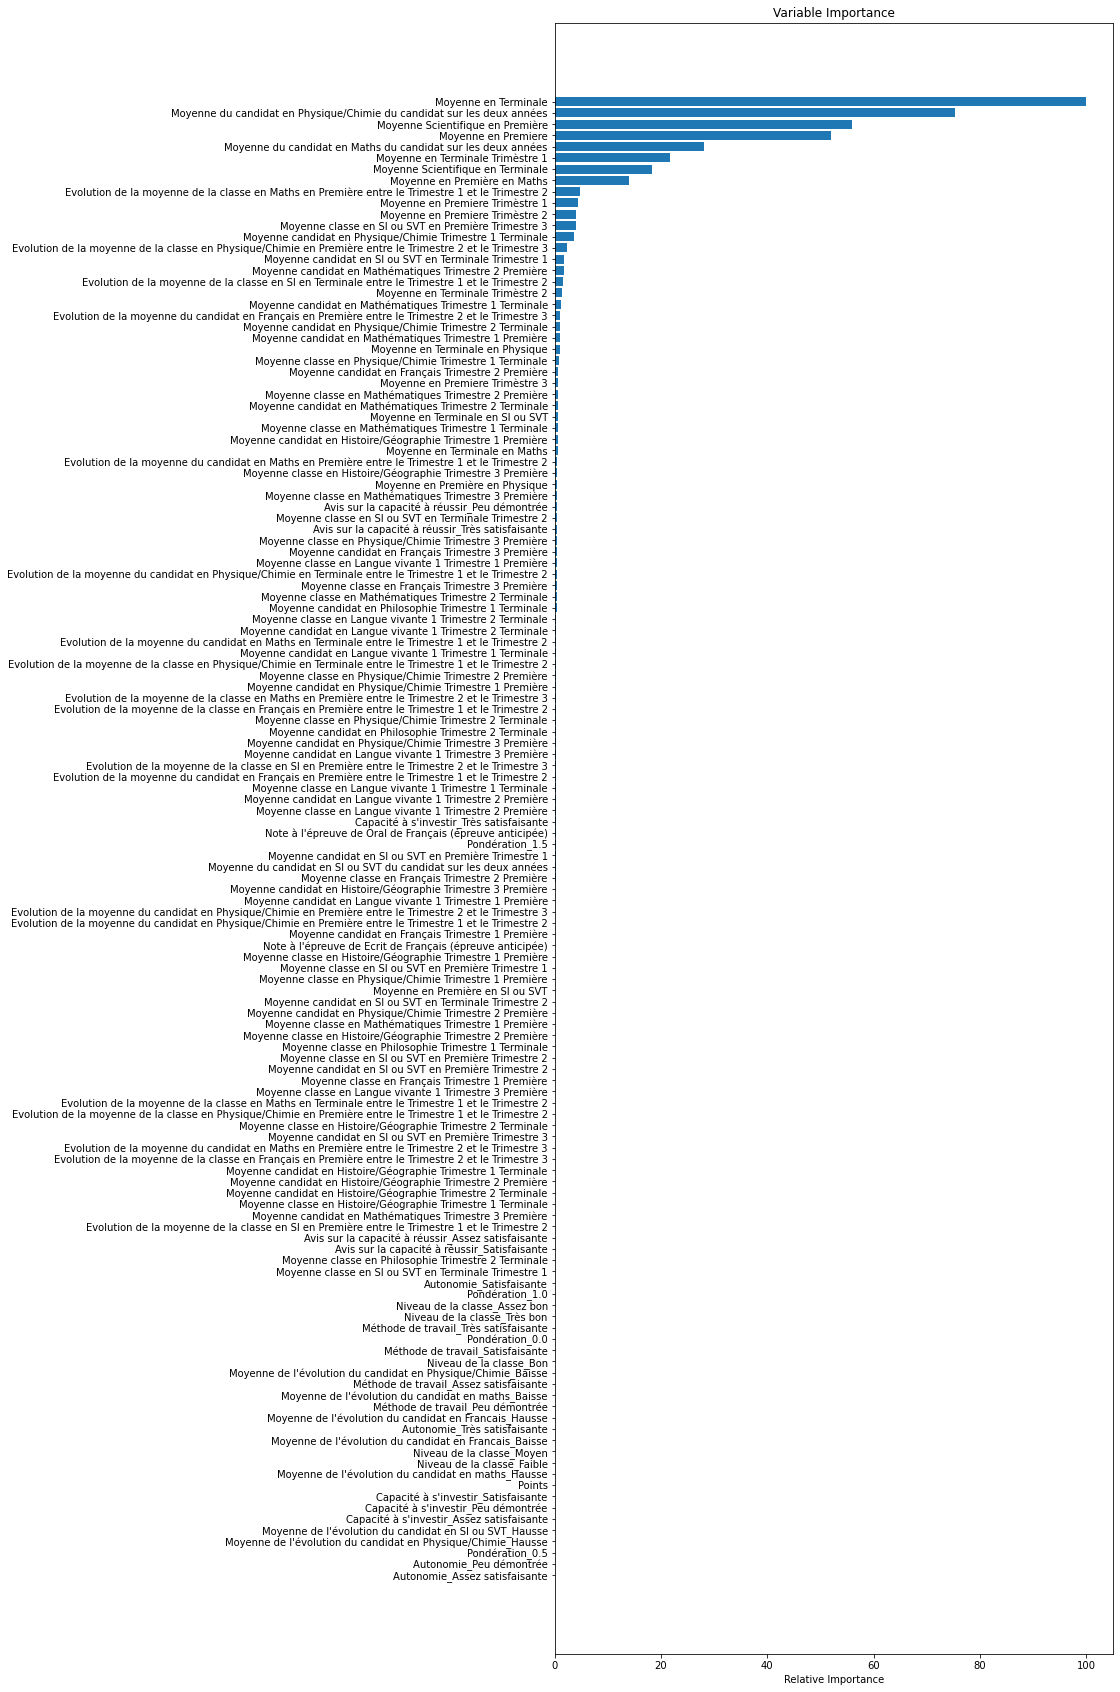

In [109]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

D'après ce graphique, nous pouvons remarquer que les colonnes que nous avons ajouté lors du pre-processing sont celles qui ont la plus grande importance sur le modèle.

# XGBOOST

In [35]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor(learning_rate =0.047,
 n_estimators=400,
 max_depth=4,
 min_child_weight=1,
 gamma=8,
 subsample=0.4,
 colsample_bytree=0.5,
 nthread=3,
 seed=26,
 random_state = 885,

)




model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("Valeur moyenne de la prédiction :", y_pred.mean())

accuracies1 = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies1.mean())

accuracies2 = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = rmse)
print('RMSE Test =', accuracies2.mean())

score : 0.952002807494922
Valeur moyenne de la prédiction : 95.365074
RMSE Train = 5.142020126589161
RMSE Test = 2.742529070427003


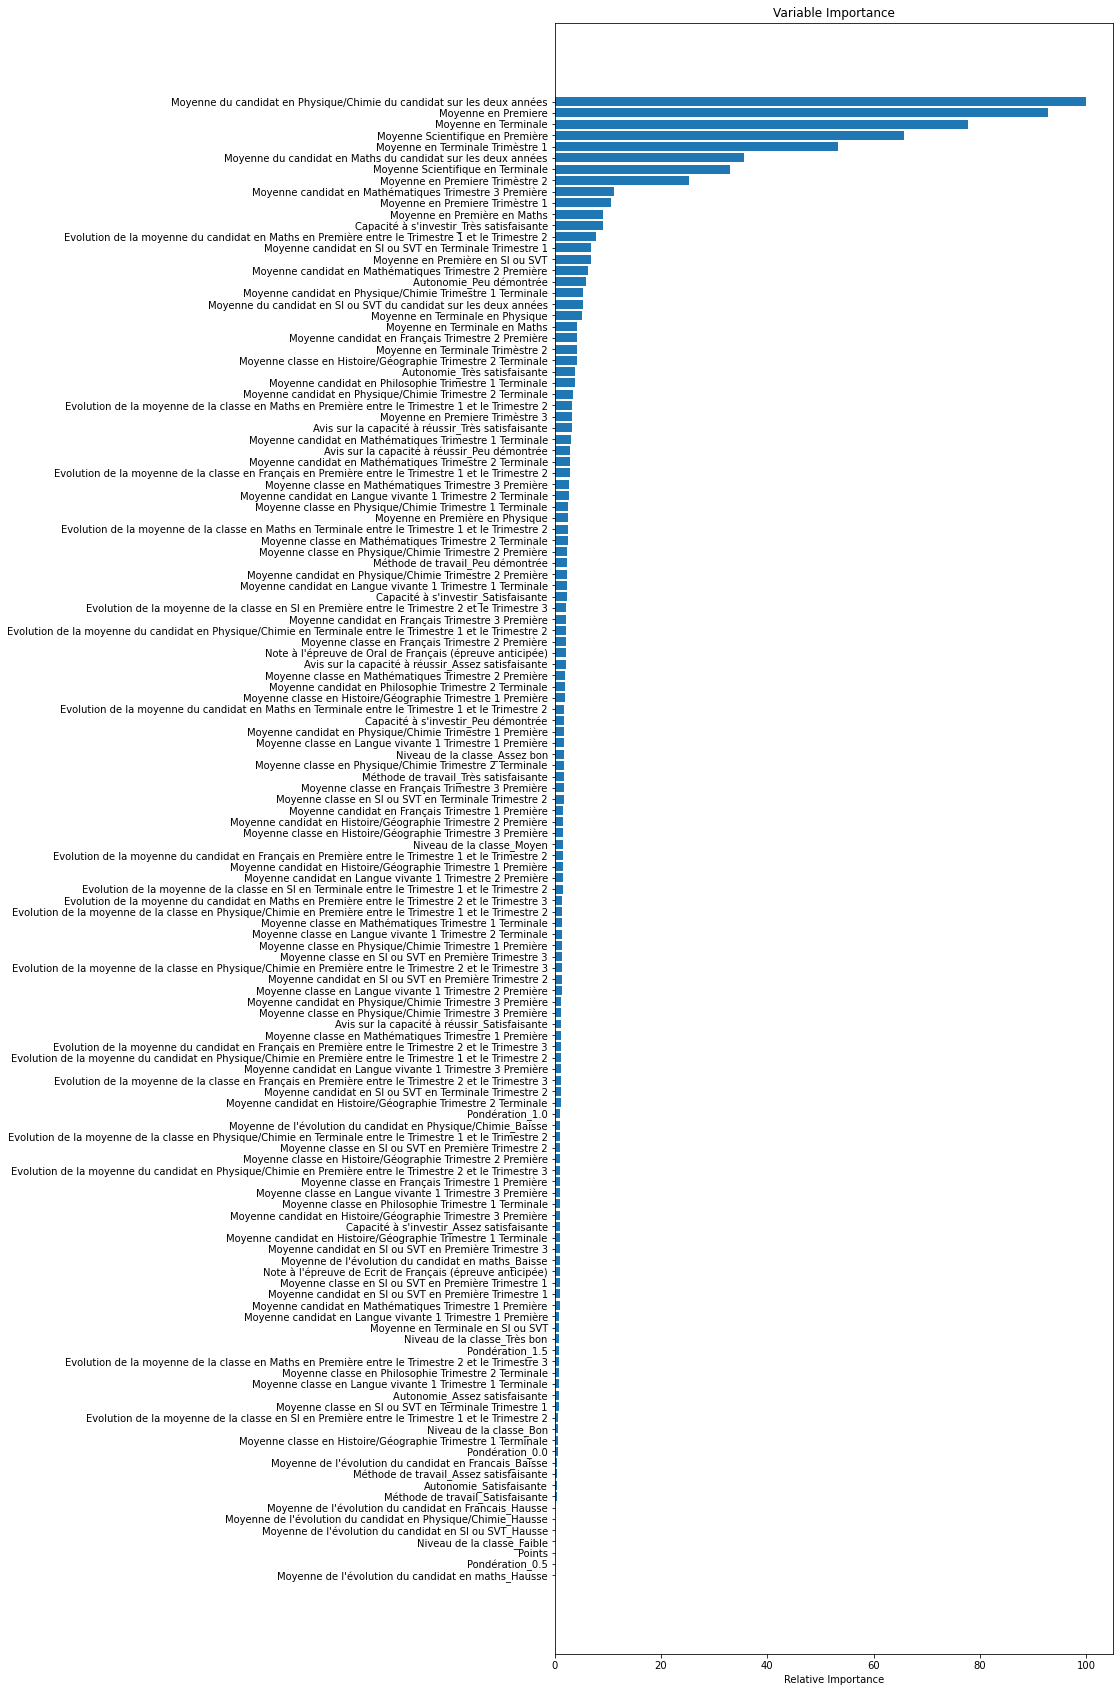

In [107]:
feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

D'après ce graphique, nous pouvons remarquer que les colonnes que nous avons ajouté lors du pre-processing sont celles qui ont la plus grande importance sur le modèle.

Il est aussi intéressant de réaliser une étude sur les paramètres de ce modèles pour determiner les meilleurs. C'est pourquoi nous utilisons ensuite RandomizedSearchCV.

In [67]:
param_dist = {
 'random_state': np.arange(1,1000),
 'n_estimators': np.arange(1, 500),
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
    "max_depth" : np.arange(1,10),
    "subsample" : np.linspace(0.1,1,num=10),
 "colsample_bytree" :np.linspace(0.1,1,num=10),
 "nthread" :np.arange(1,10),
    
    
}
pre_gs_inst = RandomizedSearchCV(XGBRegressor(),
param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957,

In [68]:
print(pre_gs_inst.best_params_)
print(pre_gs_inst.score)

{'subsample': 0.9, 'random_state': 303, 'nthread': 9, 'n_estimators': 310, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.30000000000000004}
<bound method BaseSearchCV.score of RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...

In [230]:
model = XGBRegressor(learning_rate =0.05,
 n_estimators=310,
 max_depth=5,
 min_child_weight=1,
 gamma=8,
 subsample=0.9,
 colsample_bytree=0.3,
 nthread=9,
 seed=26,
 random_state = 303,

)




model.fit(X_train, y_train)
print('score :' , model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(y_pred.mean())

accuracies1 = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = rmse)
print('RMSE Train =', accuracies1.mean())

accuracies2 = cross_val_score(estimator = model, X = X_test, y = y_test, scoring = rmse)
print('RMSE Test =', accuracies2.mean())

score : 0.9330072028876966
96.496956
RMSE Train = 5.646617127172057
RMSE Test = 3.0717986109482287


Grâce a ces nouveaux paramètres, nous obtenons un score en RMSE inférieur a celui du modèle de départ. C'est avec XGBoost que nous obtenons les meilleurs résulats, c'est pour cette raison que nous allons garder ce modèle et le tester sur le fichier test.

# Utilisation de notre modèle sur fichier test

In [36]:
test = pd.read_csv('test.csv',sep=';',decimal=',')
pd.set_option('display.max_row', 226)
pd.set_option('display.max_columns', 226)
missing = test.isna().sum()/test.shape[0]
valeurs_manquante = test.columns[(missing > 0.9)]
test = test.drop(valeurs_manquante, axis = 1)
debut = test.iloc[:, 0:6]
debut['Genre'] = debut['Genre'].replace(('H', 'F'),(0,1))
contexte = test.iloc[:, 6:13]
contexte = pd.get_dummies(contexte)
moyenne = test.iloc[:, 13:]
test = pd.concat([debut, contexte, moyenne], axis=1)

In [37]:
test['Moyenne candidat en SI ou SVT en Terminale Trimestre 1'] = np.NaN
test['Moyenne classe en SI ou SVT en Terminale Trimestre 1'] = np.NaN

test['Moyenne candidat en SI ou SVT en Terminale Trimestre 2'] = np.NaN
test['Moyenne classe en SI ou SVT en Terminale Trimestre 2'] = np.NaN

test['Moyenne candidat en SI ou SVT en Première Trimestre 1'] = np.NaN
test['Moyenne classe en SI ou SVT en Première Trimestre 1'] = np.NaN

test['Moyenne candidat en SI ou SVT en Première Trimestre 2'] = np.NaN
test['Moyenne classe en SI ou SVT en Première Trimestre 2'] = np.NaN

test['Moyenne candidat en SI ou SVT en Première Trimestre 3'] = np.NaN
test['Moyenne classe en SI ou SVT en Première Trimestre 3'] = np.NaN

In [38]:
test['Moyenne candidat en SI ou SVT en Terminale Trimestre 1'] = test['Moyenne candidat en SI ou SVT en Terminale Trimestre 1'].fillna(test[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Terminale", "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Terminale"]].max(1))
test['Moyenne candidat en SI ou SVT en Terminale Trimestre 2'] = test['Moyenne candidat en SI ou SVT en Terminale Trimestre 2'].fillna(test[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Terminale", "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Terminale"]].max(1))
#df['Moyenne candidat en SI ou SVT en Terminale Trimestre 3'] = df['Moyenne candidat en SI ou SVT en terminale Trimestre 3'].fillna(df1[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Terminale", "Moyenne candidat en Sciences de l'ingénieur Trimestre 3 Terminale"]].max(1))

test['Moyenne classe en SI ou SVT en Terminale Trimestre 1'] = test['Moyenne classe en SI ou SVT en Terminale Trimestre 1'].fillna(test[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Terminale", "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Terminale"]].max(1))
test['Moyenne classe en SI ou SVT en Terminale Trimestre 2'] = test['Moyenne classe en SI ou SVT en Terminale Trimestre 2'].fillna(test[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Terminale", "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Terminale"]].max(1))
#df['Moyenne classe en SI ou SVT en Terminale Trimestre 3'] = df['Moyenne classe en SI ou SVT en Terminale Trimestre 3'].fillna(df1[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 3 Terminale", "Moyenne classe en Sciences de l'ingénieur Trimestre 3 Terminale"]].max(1))

test['Moyenne candidat en SI ou SVT en Première Trimestre 1'] = test['Moyenne candidat en SI ou SVT en Première Trimestre 1'].fillna(test[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Première", "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Première"]].max(1))
test['Moyenne candidat en SI ou SVT en Première Trimestre 2'] = test['Moyenne candidat en SI ou SVT en Première Trimestre 2'].fillna(test[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Première", "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Première"]].max(1))
test['Moyenne candidat en SI ou SVT en Première Trimestre 3'] = test['Moyenne candidat en SI ou SVT en Première Trimestre 3'].fillna(test[["Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Première", "Moyenne candidat en Sciences de l'ingénieur Trimestre 3 Première"]].max(1))

test['Moyenne classe en SI ou SVT en Première Trimestre 1'] = test['Moyenne classe en SI ou SVT en Première Trimestre 1'].fillna(test[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Première", "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Première"]].max(1))
test['Moyenne classe en SI ou SVT en Première Trimestre 2'] = test['Moyenne classe en SI ou SVT en Première Trimestre 2'].fillna(test[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Première", "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Première"]].max(1))
test['Moyenne classe en SI ou SVT en Première Trimestre 3'] = test['Moyenne classe en SI ou SVT en Première Trimestre 3'].fillna(test[["Moyenne classe en Sciences de la Vie et de la Terre Trimestre 3 Première", "Moyenne classe en Sciences de l'ingénieur Trimestre 3 Première"]].max(1))

In [39]:
test = test.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Terminale", axis = 1)
test = test.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Terminale", axis = 1)

test = test.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Terminale", axis = 1)
test = test.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Terminale", axis = 1)

test = test.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 1 Première", axis = 1)
test = test.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 1 Première", axis = 1)

test = test.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 2 Première", axis = 1)
test = test.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 2 Première", axis = 1)

test = test.drop(columns = "Moyenne candidat en Sciences de la Vie et de la Terre Trimestre 3 Première", axis = 1)
test = test.drop(columns = "Moyenne candidat en Sciences de l'ingénieur Trimestre 3 Première", axis = 1)

test = test.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Terminale", axis = 1)
test = test.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Terminale", axis = 1)

test = test.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Terminale", axis = 1)
test = test.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Terminale", axis = 1)

test = test.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 1 Première", axis = 1)
test = test.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 1 Première", axis = 1)

test = test.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 2 Première", axis = 1)
test = test.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 2 Première", axis = 1)

test = test.drop(columns = "Moyenne classe en Sciences de la Vie et de la Terre Trimestre 3 Première", axis = 1)
test = test.drop(columns = "Moyenne classe en Sciences de l'ingénieur Trimestre 3 Première", axis = 1)

In [40]:
test = test.fillna(df.mode().iloc[0])
test = test.drop(columns = 'Nom', axis = 1)
test = test.drop(columns = 'Prénom', axis = 1)
test = test.drop(columns = 'Genre', axis = 1)
#test = test.drop(columns = 'Bac', axis = 1)

moyenne_terminale  = test.filter(regex='Moyenne candidat en').filter(regex = 'Terminale').mean(axis=1)
test['Moyenne en Terminale'] = moyenne_terminale

moyenne_terminale_trim1  = test.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 1 Terminale').mean(axis=1)
test['Moyenne en Terminale Trimèstre 1'] = moyenne_terminale_trim1

moyenne_terminale_trim2  = test.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 2 Terminale').mean(axis=1)
test['Moyenne en Terminale Trimèstre 2'] = moyenne_terminale_trim2

moyenne_premiere = test.filter(regex='Moyenne candidat en').filter(regex = 'Première').mean(axis=1)
test['Moyenne en Premiere'] = moyenne_premiere

moyenne_premiere_trim1 = test.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 1 Première').mean(axis=1)
test['Moyenne en Premiere Trimèstre 1'] = moyenne_premiere_trim1

moyenne_premiere_trim2 = test.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 2 Première').mean(axis=1)
test['Moyenne en Premiere Trimèstre 2'] = moyenne_premiere_trim2

moyenne_premiere_trim3 = test.filter(regex='Moyenne candidat en').filter(regex = 'Trimestre 3 Première').mean(axis=1)
test['Moyenne en Premiere Trimèstre 3'] = moyenne_premiere_trim3

moyenne_scientifique_terminale_maths = test.filter(regex='Moyenne candidat en').filter(regex='Mathématiques').filter(regex='Terminale').mean(axis=1)
test['Moyenne en Terminale en Maths'] = moyenne_scientifique_terminale_maths

moyenne_scientifique_terminale_phy = test.filter(regex='Moyenne candidat en').filter(regex='Physique/Chimie ').filter(regex='Terminale').mean(axis=1)
test['Moyenne en Terminale en Physique'] = moyenne_scientifique_terminale_phy

moyenne_scientifique_terminale_svt = test.filter(regex='Moyenne candidat en SI ou SVT').filter(regex='Terminale').mean(axis=1)
test['Moyenne en Terminale en SI ou SVT'] = moyenne_scientifique_terminale_svt


test['Moyenne Scientifique en Terminale'] = (moyenne_scientifique_terminale_maths + moyenne_scientifique_terminale_phy + moyenne_scientifique_terminale_svt)/3

moyenne_scientifique_premiere_maths = test.filter(regex='Moyenne candidat en').filter(regex='Mathématiques').filter(regex='Première').mean(axis=1)
test['Moyenne en Première en Maths'] = moyenne_scientifique_premiere_maths

moyenne_scientifique_premiere_phy = test.filter(regex='Moyenne candidat en').filter(regex='Physique/Chimie ').filter(regex='Première').mean(axis=1)
test['Moyenne en Première en Physique'] = moyenne_scientifique_premiere_phy

moyenne_scientifique_premiere_svt = test.filter(regex='Moyenne candidat en SI ou SVT').filter(regex='Première').mean(axis=1)
test['Moyenne en Première en SI ou SVT'] = moyenne_scientifique_premiere_svt


test['Moyenne Scientifique en Première'] = (moyenne_scientifique_premiere_maths + moyenne_scientifique_premiere_phy + moyenne_scientifique_premiere_svt)/3




In [41]:
b = pd.get_dummies(test.Pondération, prefix= 'Pondération')
test = pd.concat([b, test], axis = 1)

In [42]:
test = test.drop(columns = 'Pondération', axis = 1)
test = test.drop(columns = 'Bac', axis = 1)
first_column = test.pop('id')
test.insert(0, 'id', first_column)

In [43]:
test['Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns = test.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / test.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
test['Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns

test['Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns2 = test.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /test.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns2

test['Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3'] = 1
new_columns22 = test.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne candidat en Mathématiques').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
test['Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns22

test['Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns3 = test.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / test.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
test['Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns3

test['Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns4 = test.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns4

test['Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3'] = 1
new_columns44 = test.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne candidat en Physique/Chimie').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns44
                 
    
test['Evolution de la moyenne de la classe en Maths en Terminale entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns7 = test.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / test.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
test['Evolution de la moyenne de la classe en Maths en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns7

test['Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns8 = test.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /test.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns8

test['Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 2 et le Trimestre 3'] = 1
new_columns88 = test.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en Mathématiques').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
test['Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns88

test['Evolution de la moyenne de la classe en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns9 = test.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / test.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
test['Evolution de la moyenne de la classe en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columns9

test['Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2'] = 1
new_columns99 = test.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns99

test['Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3'] = 1
new_columns999 = test.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en Physique/Chimie').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns999
     
    

new_columnssvt = test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
test['Evolution de la moyenne de la classe en SI en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt

new_columnssvt1 = test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt1

new_columnssvt2 = test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
test['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 2 et le Trimestre 3'] = new_columnssvt2

new_columnssvt3 = test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Terminale').mean(axis=1) / test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Terminale').mean(axis=1)
df['Evolution de la moyenne de la classe en SI en Terminale entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt3

new_columnssvt4 = test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 1 et le Trimestre 2'] = new_columnssvt4

new_columnssvt5 = test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en SI').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en SI en Première entre le Trimestre 2 et le Trimestre 3'] = new_columnssvt5
                 

In [44]:
new_columns11 = test.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /test.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne du candidat en Français en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns11

new_columns12 = test.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne candidat en Français').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
test['Evolution de la moyenne du candidat en Français en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns12


new_columns14 = test.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 1').filter(regex='Première').mean(axis=1) /test.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) 
test['Evolution de la moyenne de la classe en Français en Première entre le Trimestre 1 et le Trimestre 2'] = new_columns14


new_columns15 = test.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 2').filter(regex='Première').mean(axis=1) / test.filter(regex='Moyenne classe en Français').filter(regex='Trimestre 3').filter(regex='Première').mean(axis=1)
test['Evolution de la moyenne de la classe en Français en Première entre le Trimestre 2 et le Trimestre 3'] = new_columns15
          


In [45]:
new_columns16 = (test.filter(regex="Moyenne en Terminale en Maths").mean(axis=1) + test.filter(regex="Moyenne en Première en Maths").mean(axis=1))/2
test["Moyenne du candidat en Maths du candidat sur les deux années"] = new_columns16

new_columns17 = (test.filter(regex="Moyenne en Terminale en Physique").mean(axis=1) + test.filter(regex="Moyenne en Première en Physique").mean(axis=1))/2
test["Moyenne du candidat en Physique/Chimie du candidat sur les deux années"] = new_columns17

new_columns18 = (test.filter(regex="Moyenne en Première en SI ou SVT").mean(axis=1) + test.filter(regex="Moyenne en Terminale en SI ou SVT").mean(axis=1))/2
test["Moyenne du candidat en SI ou SVT du candidat sur les deux années"] = new_columns18

In [47]:
new_columns_evolution_maths = (test.filter(regex="Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/3
maths = new_columns_evolution_maths > 1
test["Moyenne de l'évolution du candidat en Maths"] = np.where(maths, "Baisse", "Hausse")


new_columns_evolution_physiques = (test.filter(regex="Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/3
physiques = new_columns_evolution_physiques > 1
test["Moyenne de l'évolution du candidat en Physique/Chimie"] = np.where(physiques, "Baisse", "Hausse")


new_columns_evolution_svt_si = (test.filter(regex="Evolution de la moyenne du candidat en SI ou SVT en Terminale entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en SI ou SVT en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en SI ou SVT en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/3
svt = new_columns_evolution_svt_si > 1
test["Moyenne de l'évolution du candidat en SI ou SVT"] = np.where(svt, "Baisse", "Hausse")


new_columns_evolution_francais = (test.filter(regex="Evolution de la moyenne du candidat en Français en Première entre le Trimestre 1 et le Trimestre 2").mean(axis=1) + test.filter(regex="Evolution de la moyenne du candidat en Français en Première entre le Trimestre 2 et le Trimestre 3").mean(axis=1))/2
francais = new_columns_evolution_francais > 1
test["Moyenne de l'évolution du candidat en Francais"] = np.where(francais, "Baisse", "Hausse")



evolution_maths = pd.get_dummies(test["Moyenne de l'évolution du candidat en Maths"], prefix = "Moyenne de l'évolution du candidat en maths")
evolution_physiques = pd.get_dummies(test["Moyenne de l'évolution du candidat en Physique/Chimie"], prefix = "Moyenne de l'évolution du candidat en Physique/Chimie")
evolution_svt_si = pd.get_dummies(test["Moyenne de l'évolution du candidat en SI ou SVT"], prefix = "Moyenne de l'évolution du candidat en SI ou SVT")
evolution_francais = pd.get_dummies(test["Moyenne de l'évolution du candidat en Francais"], prefix = "Moyenne de l'évolution du candidat en Francais")


test = pd.concat([test, evolution_maths, evolution_svt_si, evolution_physiques,evolution_francais ], axis = 1)



In [48]:
test = test.drop(columns = "Moyenne de l'évolution du candidat en Maths", axis = 1)
test = test.drop(columns = "Moyenne de l'évolution du candidat en Physique/Chimie", axis = 1)
test = test.drop(columns = "Moyenne de l'évolution du candidat en SI ou SVT", axis = 1)
test = test.drop(columns = "Moyenne de l'évolution du candidat en Francais", axis = 1)

In [49]:
test = test.reindex(sorted(test.columns), axis = 1)

In [222]:
test

,Autonomie_Assez satisfaisante,Autonomie_Peu démontrée,Autonomie_Satisfaisante,Autonomie_Très satisfaisante,Avis sur la capacité à réussir_Assez satisfaisante,Avis sur la capacité à réussir_Peu démontrée,Avis sur la capacité à réussir_Satisfaisante,Avis sur la capacité à réussir_Très satisfaisante,Capacité à s'investir_Assez satisfaisante,Capacité à s'investir_Peu démontrée,Capacité à s'investir_Satisfaisante,Capacité à s'investir_Très satisfaisante,Evolution de la moyenne de la classe en Français en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Français en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Maths en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en Maths en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en SI en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne de la classe en SI en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne de la classe en SI en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Français en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Français en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Maths en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne du candidat en Maths en Terminale entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 1 et le Trimestre 2,Evolution de la moyenne du candidat en Physique/Chimie en Première entre le Trimestre 2 et le Trimestre 3,Evolution de la moyenne du candidat en Physique/Chimie en Terminale entre le Trimestre 1 et le Trimestre 2,Moyenne Scientifique en Première,Moyenne Scientifique en Terminale,Moyenne candidat en Français Trimestre 1 Première,Moyenne candidat en Français Trimestre 2 Première,Moyenne candidat en Français Trimestre 3 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Première,Moyenne candidat en Histoire/Géographie Trimestre 1 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 2 Première,Moyenne candidat en Histoire/Géographie Trimestre 2 Terminale,Moyenne candidat en Histoire/Géographie Trimestre 3 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Première,Moyenne candidat en Langue vivante 1 Trimestre 1 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 2 Première,Moyenne candidat en Langue vivante 1 Trimestre 2 Terminale,Moyenne candidat en Langue vivante 1 Trimestre 3 Première,Moyenne candidat en Mathématiques Trimestre 1 Première,Moyenne candidat en Mathématiques Trimestre 1 Terminale,Moyenne candidat en Mathématiques Trimestre 2 Première,Moyenne candidat en Mathématiques Trimestre 2 Terminale,Moyenne candidat en Mathématiques Trimestre 3 Première,Moyenne candidat en Philosophie Trimestre 1 Terminale,Moyenne candidat en Philosophie Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 1 Première,Moyenne candidat en Physique/Chimie Trimestre 1 Terminale,Moyenne candidat en Physique/Chimie Trimestre 2 Première,Moyenne candidat en Physique/Chimie Trimestre 2 Terminale,Moyenne candidat en Physique/Chimie Trimestre 3 Première,Moyenne candidat en SI ou SVT en Première Trimestre 1,Moyenne candidat en SI ou SVT en Première Trimestre 2,Moyenne candidat en SI ou SVT en Première Trime

In [50]:
y_pred = model.predict(test)
y_pred

array([ 78.28484   , 113.87061   ,  75.26131   , 111.569405  ,
        29.22107   ,  91.374596  , 106.26431   , 100.3705    ,
        90.79613   ,  76.5228    , 112.279945  , 110.56583   ,
       101.35618   , 111.262535  , 103.736984  , 109.57513   ,
        97.46859   , 106.1233    , 108.777016  , 100.53043   ,
        86.18022   ,  88.6625    ,  93.92881   ,  95.54515   ,
        84.70122   ,  91.683754  ,  65.53685   , 106.65386   ,
       106.18603   , 113.715775  , 115.24856   , 114.6596    ,
       109.14454   , 121.983536  ,  85.385635  ,  88.64896   ,
       105.7536    , 109.16573   ,  91.38061   ,  84.10503   ,
        99.24854   ,  95.244255  , 105.27747   ,  56.5046    ,
        98.6997    ,  97.83107   , 101.91732   ,  87.76612   ,
        84.055984  , 117.267975  ,  94.794685  , 105.19066   ,
       110.069885  ,  63.70562   , 110.942085  , 113.4961    ,
        99.34594   ,  98.138336  ,  63.155422  , 109.74091   ,
        94.328804  , 114.14885   , 111.66044   ,  94.54

In [51]:
y_pred.mean()

95.72504

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = test, y = y_pred, scoring = rmse)

In [53]:
print(accuracies.mean())

5.888758774009965


Nous obtenons un RMSE de 5.88, ce qui est correspond à un bon résultat.

In [54]:
submission = pd.DataFrame({"id" : test.id, "Points" : y_pred })

Afin de pouvoir soumettre sur Kaggle, il faut créer une DataFrame avec les données dont nous avons besoin. Pour ce faire il faut créer un dictionnaire avec les valeurs de l'id et de la prédiction.

In [57]:
submission.to_csv("submission_final.csv",index=0)
submi = pd.read_csv("submission_final.csv", index_col=0)

In [56]:
submi = pd.read_csv("submission_final.csv", index_col=0)
submi

,Points
id,
0,78.284840
1,113.870610
2,75.261310
3,111.569405
4,29.221070
...,...
845,77.911990
846,93.209510
847,113.976930
